In [20]:
import matplotlib.pyplot as plt

from keras import models
from keras import layers
from keras.utils import to_categorical
from keras.datasets import mnist

from sklearn.metrics.classification import classification_report

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


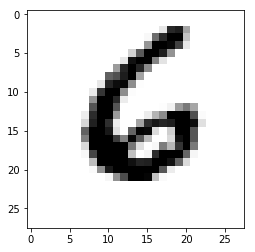

In [7]:
digit = train_images[90]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [8]:
print(train_labels)
print(test_labels)

[5 0 4 ..., 5 6 8]
[7 2 1 ..., 4 5 6]


In [9]:
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

In [10]:
network.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [11]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [12]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [13]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [14]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [15]:
train_labels

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.]])

In [16]:
history = network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 2s - loss: 0.2547 - acc: 0.9256     
Epoch 2/5
60000/60000 [==============================] - 2s - loss: 0.1022 - acc: 0.9694     
Epoch 3/5
60000/60000 [==============================] - 2s - loss: 0.0678 - acc: 0.9797     
Epoch 4/5
60000/60000 [==============================] - 2s - loss: 0.0483 - acc: 0.9855     
Epoch 5/5
60000/60000 [==============================] - 2s - loss: 0.0366 - acc: 0.9891     


In [46]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

 8448/10000 [========================>.....] - ETA: 0s

In [47]:
print('test_acc:', test_acc)

test_acc: 0.9818


In [27]:
network.layers[0].shape

AttributeError: 'Dense' object has no attribute 'shape'